In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [2]:
a = 2
c = 4
epsilon = 0.1

length = 6
height = 8

size = 900 # size of circles in plots below

epsilon = 0.2 # amount of strain

alpha = 0.7 # makes unstrained atoms a little transparent

Hexagon = np.array([[-a, 0], [-a/2, np.sqrt(3) * a/2], [a/2, np.sqrt(3) * a/2], [a, 0],
               [a/2, -np.sqrt(3) * a/2], [-a/2, -np.sqrt(3) * a/2], [-a, 0]])
Hexagonmaxx = max(Hexagon[:,0])
Hexagonmaxy = max(Hexagon[:,1])

Hexagonside = np.array([[-a/2, c/2], [a/2, c/2], [a/2, -c/2], [-a/2, -c/2],[-a/2, c/2]])
Hexagonsidemaxx = max(Hexagonside[:,0])
Hexagonsidemaxy = max(Hexagonside[:,1])

# A1g,1 $\qquad\sim x^2 + y^2$

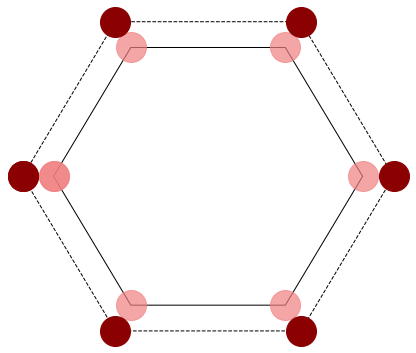

In [3]:
def A1g1 (epsilon, position):
    return epsilon * (position[0]**2 + position[1]**2)
def A1g1gradient (epsilon, position):
    return epsilon * np.array([position[0], position[1]])


HexagonA1g1 = Hexagon + np.array([A1g1gradient(epsilon, Hexagon[i]) for i in np.arange(len(Hexagon))])

HexagonA1g1maxx = max(HexagonA1g1[:,0])
HexagonA1g1maxy = max(HexagonA1g1[:,1])
fx = max([HexagonA1g1maxx, Hexagonmaxx]) / Hexagonmaxx
fy = max([HexagonA1g1maxy, Hexagonmaxy]) / Hexagonmaxy


plt.figure(figsize=(length * fx, length / 2 * np.sqrt(3) * fy))
plt.axis('off')

boarder = 0.27
plt.xlim(-HexagonA1g1maxx-boarder, HexagonA1g1maxx+boarder)
plt.ylim(-HexagonA1g1maxy-boarder, HexagonA1g1maxy+boarder)

boarder = 0.2
plt.xlim(-HexagonA1g1maxx-boarder, HexagonA1g1maxx+boarder)
plt.ylim(-HexagonA1g1maxy-boarder, HexagonA1g1maxy+boarder)

plt.plot(Hexagon[:, 0], Hexagon[:,1], c='black', linewidth = 1, zorder=0)
plt.scatter(Hexagon[:, 0], Hexagon[:,1], s = size, marker = "o", facecolors='lightcoral', edgecolors='lightcoral', zorder = 1, alpha=alpha)

plt.plot(HexagonA1g1[:, 0], HexagonA1g1[:,1], linestyle='--', c='black', linewidth = 1, zorder=0)
plt.scatter(HexagonA1g1[:, 0], HexagonA1g1[:,1], s = size, marker = "o", facecolors='darkred', edgecolors='darkred')

folder = "C:\\Users\\Florian\\Box Sync\\Projects\\Mn3Ge\\Conferences\\March Meeting 2020\\Presentation"
name = "A1g1_static"
filetype = '.png'
#plt.savefig(folder+'\\'+name+filetype, bbox_inches='tight', dpi=100)

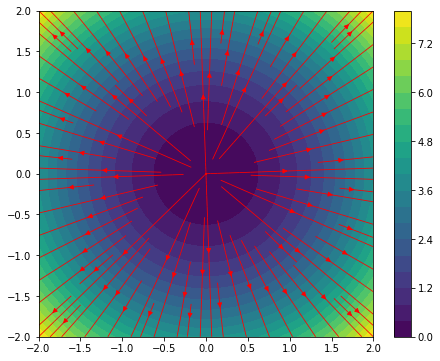

In [4]:
x = np.linspace(-2, 2, 100)
y = x
z = [[A1g1(1, [j, i]) for j in x] for i in y]

u = np.array([[A1g1gradient(1, np.array([j, i]))[0] for j in x] for i in y])
v = np.array([[A1g1gradient(1, np.array([j, i]))[1] for j in x] for i in y])

plt.figure(figsize=(7.5,6))
plt.contourf(x, y, z, 20)
plt.colorbar()
plt.streamplot(x, y, u, v, density=1, color='red', linewidth=.8)

# E2g $\qquad\sim\left( x^2-y^2,\,xy \right)$ 
## here: $x^2-y^2$

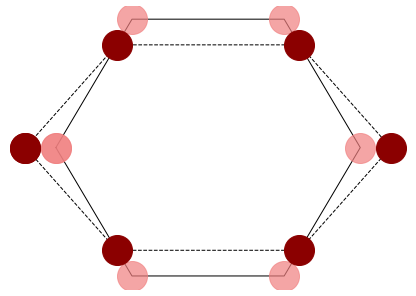

In [5]:
def E2g1 (epsilon, position):
    return epsilon * (position[0]**2 - position[1]**2)
def E2g1gradient (epsilon, position):
    return epsilon * np.array([position[0], -position[1]])

#epsilon = 0.15
HexagonE2g1 = Hexagon + np.array([E2g1gradient(epsilon, Hexagon[i]) for i in np.arange(len(Hexagon))])
      
    
HexagonE2g1maxx = max(HexagonE2g1[:,0])
HexagonE2g1maxy = max(HexagonE2g1[:,1])
fx = max([HexagonE2g1maxx, Hexagonmaxx]) / Hexagonmaxx
fy = max([HexagonE2g1maxy, Hexagonmaxy]) / Hexagonmaxy


plt.figure(figsize=(length * fx, length / 2 * np.sqrt(3) * fy))
plt.axis('off')

#boarder = 0.27
#plt.xlim(-HexagonE2g1maxx-boarder, HexagonE2g1maxx+boarder)
#plt.ylim(-HexagonE2g1maxy-boarder, HexagonE2g1maxy+boarder)

plt.plot(Hexagon[:, 0], Hexagon[:,1], c='black', linewidth = 1, zorder=0)
plt.scatter(Hexagon[:, 0], Hexagon[:,1], s = size, marker = "o", facecolors='lightcoral', edgecolors='lightcoral', zorder = 1, alpha=alpha)

plt.plot(HexagonE2g1[:, 0], HexagonE2g1[:,1], linestyle='--', c='black', linewidth = 1, zorder=1)
plt.scatter(HexagonE2g1[:, 0], HexagonE2g1[:,1], s = size, marker = "o", facecolors='darkred', edgecolors='darkred', zorder=2)

folder = "C:\\Users\\Florian\\Box Sync\\Projects\\Mn3Ge\\Conferences\\March Meeting 2020\\Presentation"
name = "E2g1_static"
filetype = '.png'
#plt.savefig(folder+'\\'+name+filetype, bbox_inches='tight', dpi=100)

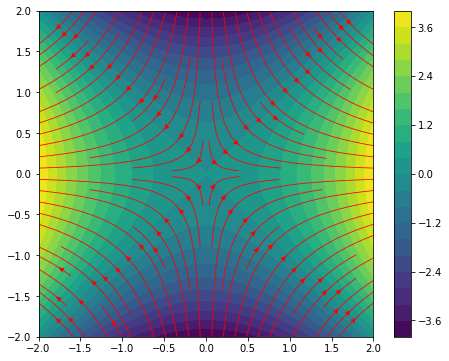

In [6]:
x = np.linspace(-2, 2, 100)
y = x
z = [[E2g1(1, [j, i]) for j in x] for i in y]

u = np.array([[E2g1gradient(1, np.array([j, i]))[0] for j in x] for i in y])
v = np.array([[E2g1gradient(1, np.array([j, i]))[1] for j in x] for i in y])

plt.figure(figsize=(7.5,6))
plt.contourf(x, y, z, 20)
plt.colorbar()
plt.streamplot(x, y, u, v, density=1, color='red', linewidth=.8)

# E2g $\qquad\sim\left( x^2-y^2,\,xy \right)$ 
## here: $xy$

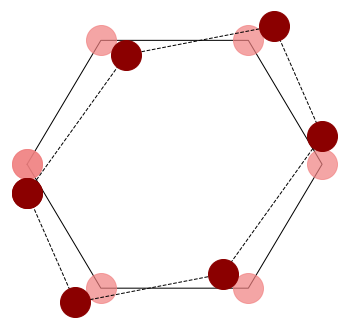

In [7]:
def E2g2 (epsilon, position):
    return epsilon * position[0] * position[1]
def E2g2gradient (epsilon, position):
    return epsilon * np.array([position[1], position[0]])


#epsilon = 0.15
HexagonE2g2 = Hexagon + np.array([E2g2gradient(epsilon, Hexagon[i]) for i in np.arange(len(Hexagon))])


HexagonE2g2maxx = max(HexagonE2g2[:,0])
HexagonE2g2maxy = max(HexagonE2g2[:,1])
fx = max([HexagonE2g2maxx, Hexagonmaxx]) / Hexagonmaxx
fy = max([HexagonE2g2maxy, Hexagonmaxy]) / Hexagonmaxy


plt.figure(figsize=(length * fx, length / 2 * np.sqrt(3) * fy))
plt.axis('off')

boarder = 0.27
plt.xlim(-HexagonE2g2maxx-boarder, HexagonE2g2maxx+boarder)
plt.ylim(-HexagonE2g2maxy-boarder, HexagonE2g2maxy+boarder)


plt.plot(Hexagon[:, 0], Hexagon[:,1], c='black', linewidth = 1, zorder=0)
plt.scatter(Hexagon[:, 0], Hexagon[:,1], s = size, marker = "o", facecolors='lightcoral', edgecolors='lightcoral', zorder = 1, alpha=alpha)

plt.plot(HexagonE2g2[:, 0], HexagonE2g2[:,1], linestyle='--', c='black', linewidth = 1, zorder=1)
plt.scatter(HexagonE2g2[:, 0], HexagonE2g2[:,1], s = size, marker = "o", facecolors='darkred', edgecolors='darkred', zorder=2)

folder = "C:\\Users\\Florian\\Box Sync\\Projects\\Mn3Ge\\Conferences\\March Meeting 2020\\Presentation"
name = "E2g2_static"
filetype = '.png'
#plt.savefig(folder+'\\'+name+filetype, bbox_inches='tight', dpi=100)

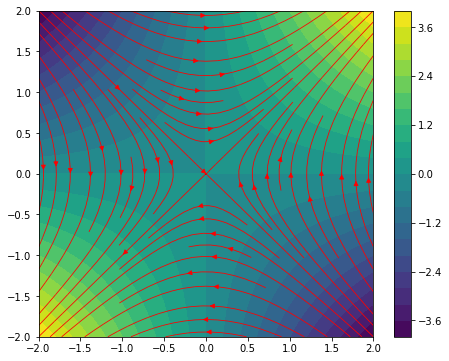

In [8]:
x = np.linspace(-2, 2, 100)
y = x
z = [[E2g2(1, [j, i]) for j in x] for i in y]

u = np.array([[E2g2gradient(1, np.array([j, i]))[0] for j in x] for i in y])
v = np.array([[E2g2gradient(1, np.array([j, i]))[1] for j in x] for i in y])

plt.figure(figsize=(7.5,6))
plt.contourf(x, y, z, 20)
plt.colorbar()
plt.streamplot(x, y, u, v, density=1, color='red', linewidth=.8)

# A1g,2 $\qquad\sim z^2$

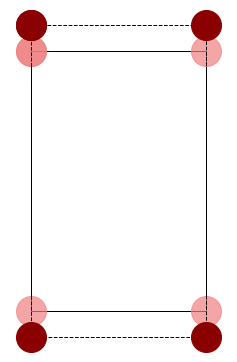

In [9]:
def A1g2 (epsilon, position):
    return epsilon * position[1]**2
def A1g2gradient (epsilon, position):
    return epsilon * np.array([0, position[1]])


#epsilon = 0.15
HexagonA1g2 = Hexagonside + np.array([A1g2gradient(epsilon, Hexagonside[i]) for i in np.arange(len(Hexagonside))])


HexagonA1g2maxx = max(HexagonA1g2[:,0])
HexagonA1g2maxy = max(HexagonA1g2[:,1])
fx = max([HexagonA1g2maxx, Hexagonsidemaxx]) / Hexagonsidemaxx
fy = max([HexagonA1g2maxy, Hexagonsidemaxy]) / Hexagonsidemaxy


plt.figure(figsize=(length * fx/1.5, height * fy/1.5))
plt.axis('off')

boarder = 0.275
plt.xlim(-HexagonA1g2maxx-boarder, HexagonA1g2maxx+boarder)
plt.ylim(-HexagonA1g2maxy-boarder, HexagonA1g2maxy+boarder)

plt.plot(Hexagonside[:, 0], Hexagonside[:,1], c='black', linewidth = 1, zorder=0)
plt.scatter(Hexagonside[:, 0], Hexagonside[:,1], s = size, marker = "o", facecolors='lightcoral', edgecolors='lightcoral', zorder = 1, alpha=alpha)

plt.plot(HexagonA1g2[:, 0], HexagonA1g2[:,1], linestyle='--', c='black', linewidth = 1, zorder=1)
plt.scatter(HexagonA1g2[:, 0], HexagonA1g2[:,1], s = size, marker = "o", facecolors='darkred', edgecolors='darkred', zorder=2)

folder = "C:\\Users\\Florian\\Box Sync\\Projects\\Mn3Ge\\Conferences\\March Meeting 2020\\Presentation"
name = "A1g2_static"
filetype = '.png'
#plt.savefig(folder+'\\'+name+filetype, bbox_inches='tight', dpi=100)

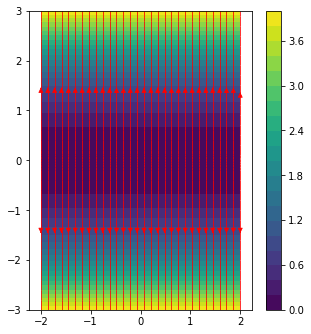

In [10]:
x = np.linspace(-2, 2, 100)
z = 1.5*x
value = [[A1g2(1, [j, i]) for j in x] for i in y]

u = np.array([[A1g2gradient(1, np.array([j, i]))[0] for j in x] for i in y])
v = np.array([[A1g2gradient(1, np.array([j, i]))[1] for j in x] for i in y])

plt.figure(figsize=(5,5.5))
plt.contourf(x, z, value, 20)
plt.colorbar()
plt.streamplot(x, z, u, v, density=1, color='red', linewidth=.8)

# E1g $\qquad\sim\left( xz,\,yz \right)$ 
## here: $xz$

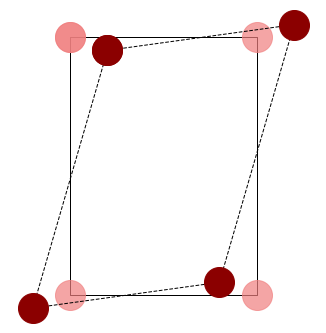

In [11]:
def E1g (epsilon, position):
    return epsilon * position[0] * position[1]
def E1ggradient (epsilon, position):
    return epsilon * np.array([position[1], position[0]])


#epsilon = 0.15
HexagonE1g = Hexagonside + np.array([E1ggradient(epsilon, Hexagonside[i]) for i in np.arange(len(Hexagonside))])

HexagonE1gmaxx = max(HexagonE1g[:,0])
HexagonE1gmaxy = max(HexagonE1g[:,1])
fx = max([HexagonE1gmaxx, Hexagonsidemaxx]) / Hexagonsidemaxx
fy = max([HexagonE1gmaxy, Hexagonsidemaxy]) / Hexagonsidemaxy


plt.figure(figsize=(length * fx/1.5, height * fy/1.5))
plt.axis('off')
boarder = 0.275
plt.xlim(-HexagonE1gmaxx-boarder, HexagonE1gmaxx+boarder)
plt.ylim(-HexagonE1gmaxy-boarder, HexagonE1gmaxy+boarder)

plt.plot(Hexagonside[:, 0], Hexagonside[:,1], c='black', linewidth = 1, zorder=0)
plt.scatter(Hexagonside[:, 0], Hexagonside[:,1], s = size, marker = "o", facecolors='lightcoral', edgecolors='lightcoral', zorder = 1, alpha=alpha)

plt.plot(HexagonE1g[:, 0], HexagonE1g[:,1], linestyle='--', c='black', linewidth = 1, zorder=1)
plt.scatter(HexagonE1g[:, 0], HexagonE1g[:,1], s = size, marker = "o", facecolors='darkred', edgecolors='darkred', zorder=2)


folder = "C:\\Users\\Florian\\Box Sync\\Projects\\Mn3Ge\\Conferences\\March Meeting 2020\\Presentation"
name = "E1g_static"
filetype = '.png'
#plt.savefig(folder+'\\'+name+filetype, bbox_inches='tight', dpi=100)

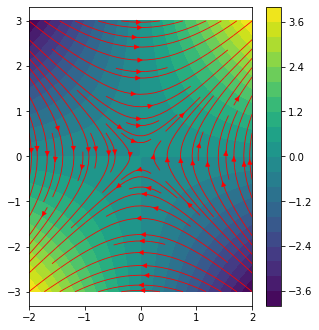

In [12]:
x = np.linspace(-2, 2, 100)
z = 1.5*x
value = [[E1g(1, [j, i]) for j in x] for i in y]

u = np.array([[E1ggradient(1, np.array([j, i]))[0] for j in x] for i in y])
v = np.array([[E1ggradient(1, np.array([j, i]))[1] for j in x] for i in y])

plt.figure(figsize=(5,5.5))
plt.contourf(x, z, value, 20)
plt.colorbar()
plt.streamplot(x, z, u, v, density=1, color='red', linewidth=.8)

# Animations

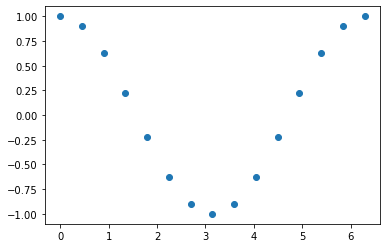

In [13]:
# this is for the animations later
x = np.linspace(0, 2*np.pi, 15)
scale = np.cos(x)

plt.scatter(x, scale)

## A1g,1

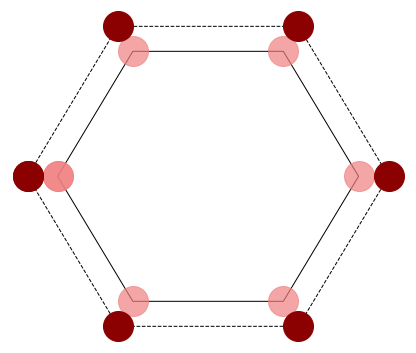

In [17]:
change = np.array([A1g1gradient(epsilon, Hexagon[i]) for i in np.arange(len(Hexagon))])
HexagonA1g1 = np.array([Hexagon + i * change for i in scale])

HexagonA1g1maxx = max(HexagonA1g1[-1][:,0])
HexagonA1g1maxy = max(HexagonA1g1[-1][:,1])
fx = max([HexagonA1g1maxx, Hexagonmaxx]) / Hexagonmaxx
fy = max([HexagonA1g1maxy, Hexagonmaxy]) / Hexagonmaxy


fig, ax = plt.subplots(figsize=(length * fx, length / 2 * np.sqrt(3) * fy))
plt.axis('off')

boarder = 0.27
ax.set(xlim=(-HexagonA1g1maxx-boarder, HexagonA1g1maxx+boarder), ylim=(-HexagonA1g1maxy-boarder, HexagonA1g1maxy+boarder))

ax.plot(Hexagon[:, 0], Hexagon[:,1], c='black', linewidth = 1, zorder=0)
ax.scatter(Hexagon[:, 0], Hexagon[:,1], s = size, marker = "o", facecolors='lightcoral', edgecolors='lightcoral', zorder = 1, alpha=alpha)


line1, = ax.plot(HexagonA1g1[0][:, 0], HexagonA1g1[0][:,1], linestyle='--', c='black', linewidth = 1, zorder=1)
line2 = ax.scatter(HexagonA1g1[0][:, 0], HexagonA1g1[0][:,1], s = size, marker = "o", facecolors='darkred', edgecolors='darkred', zorder=2)

def animate(i):
    line1.set_data(HexagonA1g1[i][:, 0], HexagonA1g1[i][:,1])
    line2.set_offsets(np.c_[HexagonA1g1[i][:, 0], HexagonA1g1[i][:,1]])


    
anim = FuncAnimation(fig, animate, frames=len(scale)-1, interval=10, repeat=True)

plt.show()

# anim.save('A1g1.gif', writer='imagemagick', dpi=500)

## E2g,1

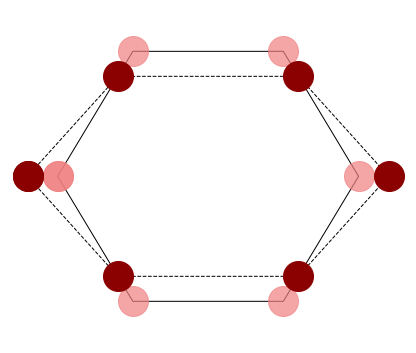

In [18]:
change = np.array([E2g1gradient(epsilon, Hexagon[i]) for i in np.arange(len(Hexagon))])
HexagonE2g1 = np.array([Hexagon + i * change for i in scale])

HexagonE2g1maxx = max(HexagonE2g1[len(scale)-1][:,0])
HexagonE2g1maxy = max(HexagonE2g1[int(len(scale)/2)][:,1])
fx = max([HexagonE2g1maxx, Hexagonmaxx]) / Hexagonmaxx
fy = max([HexagonE2g1maxy, Hexagonmaxy]) / Hexagonmaxy


fig, ax = plt.subplots(figsize=(length * fx, length / 2 * np.sqrt(3) * fy))
plt.axis('off')

boarder = 0.27
ax.set(xlim=(-HexagonE2g1maxx-boarder, HexagonE2g1maxx+boarder), ylim=(-HexagonE2g1maxy-boarder, HexagonE2g1maxy+boarder))

ax.plot(Hexagon[:, 0], Hexagon[:,1], c='black', linewidth = 1, zorder=0)
ax.scatter(Hexagon[:, 0], Hexagon[:,1], s = size, marker = "o", facecolors='lightcoral', edgecolors='lightcoral', zorder = 1, alpha=alpha)


line1, = ax.plot(HexagonE2g1[0][:, 0], HexagonE2g1[0][:,1], linestyle='--', c='black', linewidth = 1, zorder=1)
line2 = ax.scatter(HexagonE2g1[0][:, 0], HexagonE2g1[0][:,1], s = size, marker = "o", facecolors='darkred', edgecolors='darkred', zorder=2)

def animate(i):
    line1.set_data(HexagonE2g1[i][:, 0], HexagonE2g1[i][:,1])
    line2.set_offsets(np.c_[HexagonE2g1[i][:, 0], HexagonE2g1[i][:,1]])


    
anim = FuncAnimation(fig, animate, frames=len(scale)-1, interval=10, repeat=True)

plt.show()

anim.save('E2g1.gif', writer='imagemagick', dpi=500)

## E2g,2

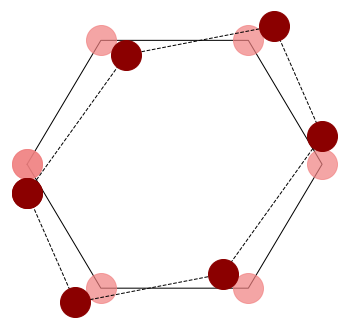

In [23]:
change = np.array([E2g2gradient(epsilon, Hexagon[i]) for i in np.arange(len(Hexagon))])
HexagonE2g2 = np.array([Hexagon + i * change for i in scale])


HexagonE2g2maxx = max(HexagonE2g2[len(scale)-1][:,0])
HexagonE2g2maxy = max(HexagonE2g2[int(len(scale)/2)][:,1])
fx = max([HexagonE2g2maxx, Hexagonmaxx]) / Hexagonmaxx
fy = max([HexagonE2g2maxy, Hexagonmaxy]) / Hexagonmaxy


fig, ax = plt.subplots(figsize=(length * fx, length / 2 * np.sqrt(3) * fy))
plt.axis('off')

boarder = 0.27
ax.set(xlim=(-HexagonE2g2maxx-boarder, HexagonE2g2maxx+boarder), ylim=(-HexagonE2g2maxy-boarder, HexagonE2g2maxy+boarder))

ax.plot(Hexagon[:, 0], Hexagon[:,1], c='black', linewidth = 1, zorder=0)
ax.scatter(Hexagon[:, 0], Hexagon[:,1], s = size, marker = "o", facecolors='lightcoral', edgecolors='lightcoral', zorder = 1, alpha=alpha)


line1, = ax.plot(HexagonE2g2[0][:, 0], HexagonE2g2[0][:,1], linestyle='--', c='black', linewidth = 1, zorder=1)
line2 = ax.scatter(HexagonE2g2[0][:, 0], HexagonE2g2[0][:,1], s = size, marker = "o", facecolors='darkred', edgecolors='darkred', zorder=2)

def animate(i):
    line1.set_data(HexagonE2g2[i][:, 0], HexagonE2g2[i][:,1])
    line2.set_offsets(np.c_[HexagonE2g2[i][:, 0], HexagonE2g2[i][:,1]])


    
anim = FuncAnimation(fig, animate, frames=len(scale)-1, interval=10, repeat=True)

plt.show()

#anim.save('filename.mp4', dpi=100, fps=500)
anim.save('E2g2.gif', writer='imagemagick', dpi=500)

## A1g,2

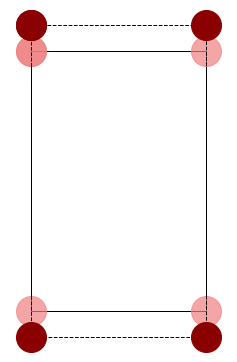

In [25]:
change = np.array([A1g2gradient(epsilon, Hexagonside[i]) for i in np.arange(len(Hexagonside))])
HexagonA1g2 = np.array([Hexagonside + i * change for i in scale])


HexagonA1g2maxx = max(HexagonA1g2[len(scale)-1][:,0])
HexagonA1g2maxy = max(HexagonA1g2[len(scale)-1][:,1])
fx = max([HexagonA1g2maxx, Hexagonsidemaxx]) / Hexagonsidemaxx
fy = max([HexagonA1g2maxy, Hexagonsidemaxy]) / Hexagonsidemaxy


fig, ax = plt.subplots(figsize=(length * fx/1.5, height * fy/1.5))
plt.axis('off')

boarder = 0.275
ax.set(xlim=(-HexagonA1g2maxx-boarder, HexagonA1g2maxx+boarder), ylim=(-HexagonA1g2maxy-boarder, HexagonA1g2maxy+boarder))

ax.plot(Hexagonside[:, 0], Hexagonside[:,1], c='black', linewidth = 1, zorder=0)
ax.scatter(Hexagonside[:, 0], Hexagonside[:,1], s = size, marker = "o", facecolors='lightcoral', edgecolors='lightcoral', zorder = 1, alpha=alpha)


line1, = ax.plot(HexagonA1g2[0][:, 0], HexagonA1g2[0][:,1], linestyle='--', c='black', linewidth = 1, zorder=1)
line2 = ax.scatter(HexagonA1g2[0][:, 0], HexagonA1g2[0][:,1], s = size, marker = "o", facecolors='darkred', edgecolors='darkred', zorder=2)

def animate(i):
    line1.set_data(HexagonA1g2[i][:, 0], HexagonA1g2[i][:,1])
    line2.set_offsets(np.c_[HexagonA1g2[i][:, 0], HexagonA1g2[i][:,1]])


    
anim = FuncAnimation(fig, animate, frames=len(scale)-1, interval=10, repeat=True)

plt.show()

#anim.save('filename.mp4', dpi=100, fps=500)
#anim.save('A1g2.gif', writer='imagemagick', dpi=100)

## E1g

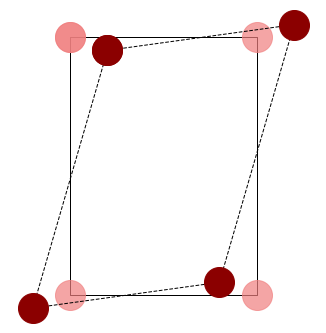

In [26]:
change = np.array([E1ggradient(epsilon, Hexagonside[i]) for i in np.arange(len(Hexagonside))])
HexagonE1g = np.array([Hexagonside + i * change for i in scale])


HexagonE1gmaxx = max(HexagonE1g[len(scale)-1][:,0])
HexagonE1gmaxy = max(HexagonE1g[len(scale)-1][:,1])
fx = max([HexagonE1gmaxx, Hexagonsidemaxx]) / Hexagonsidemaxx
fy = max([HexagonE1gmaxy, Hexagonsidemaxy]) / Hexagonsidemaxy


fig, ax = plt.subplots(figsize=(length * fx/1.5, height * fy/1.5))
plt.axis('off')

boarder = 0.275
ax.set(xlim=(-HexagonE1gmaxx-boarder, HexagonE1gmaxx+boarder), ylim=(-HexagonE1gmaxy-boarder, HexagonE1gmaxy+boarder))

ax.plot(Hexagonside[:, 0], Hexagonside[:,1], c='black', linewidth = 1, zorder=0)
ax.scatter(Hexagonside[:, 0], Hexagonside[:,1], s = size, marker = "o", facecolors='lightcoral', edgecolors='lightcoral', zorder = 1, alpha=alpha)


line1, = ax.plot(HexagonE1g[0][:, 0], HexagonE1g[0][:,1], linestyle='--', c='black', linewidth = 1, zorder=1)
line2 = ax.scatter(HexagonE1g[0][:, 0], HexagonE1g[0][:,1], s = size, marker = "o", facecolors='darkred', edgecolors='darkred', zorder=2)

def animate(i):
    line1.set_data(HexagonE1g[i][:, 0], HexagonE1g[i][:,1])
    line2.set_offsets(np.c_[HexagonE1g[i][:, 0], HexagonE1g[i][:,1]])


    
anim = FuncAnimation(fig, animate, frames=len(scale)-1, interval=10, repeat=True)

plt.show()

#anim.save('filename.mp4', dpi=100, fps=500)
#anim.save('E1g.gif', writer='imagemagick', dpi=100)